In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 


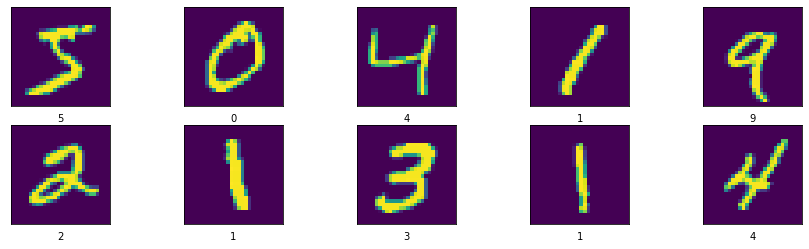

In [2]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(15,4))

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])


x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test  = x_test.reshape(x_test.shape[0],28,28,1)

In [3]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(28,28,1)))

model.add(tf.keras.layers.Conv2D(32, 3, activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(16, 3, activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))



model.compile(
                loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
)

In [4]:
history = model.fit(x_train,y_train, epochs =10, verbose=1, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2467 - accuracy: 0.9286 - val_loss: 0.1106 - val_accuracy: 0.9668
Epoch 2/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0880 - accuracy: 0.9729 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0478 - val_accuracy: 0.9862
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0446 - val_accuracy: 0.9867
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0470 -

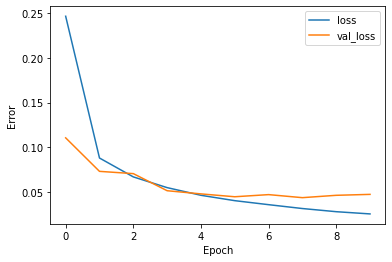

In [5]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label ='val_loss')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [6]:
loss, acc = model.evaluate(x_test,y_test, verbose=0)
print(f'Loss:{loss}, acc:{acc}')

Loss:0.039308879524469376, acc:0.9876000285148621


In [7]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


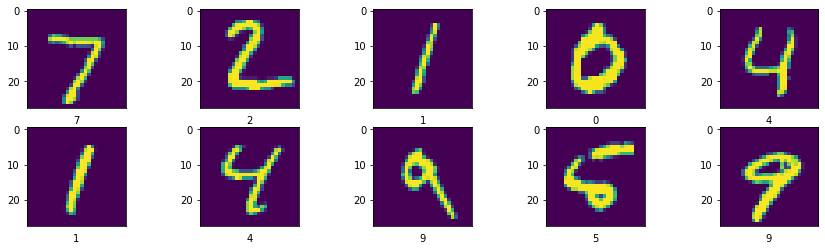

In [8]:
plt.figure(figsize=(15,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.xlabel(np.argmax(y_pred[i]))

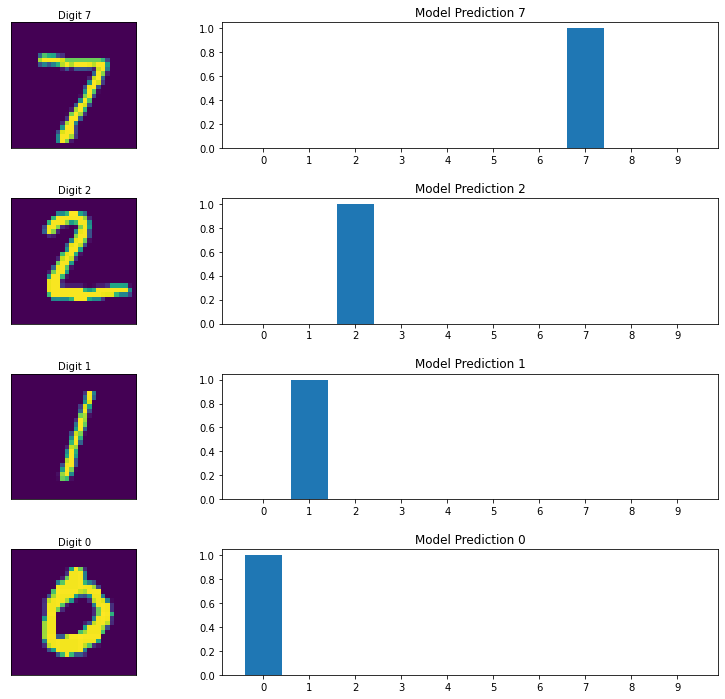

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i in range(4):
    axes[i,0].imshow(x_test[i])
    axes[i,0].get_xaxis().set_visible(False)
    axes[i,0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {y_test[i]}')

    axes[i, 1].bar(np.arange(10), y_pred[i])
    axes[i, 1].set_xticks(np.arange(10))
    axes[i,1].set_title(f"Model Prediction {np.argmax(y_pred[i])}")

